#### Metode i primjena vjestacke inteligencije
#### Laboratorijska vjezba 6
#### Student: Masovic Haris
#### Index: 1689/17993

## 0. Dependencies

In [1]:
import sys

!{sys.executable} -m pip install matplotlib

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.8/bin/python3.8 -m pip install --upgrade pip' command.


## 2. Dataset: The Boston Housing Price

### 2.1 Ucitavanje dataset-a

In [2]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

#### 2.1.3 Za prvih 15 sekvenci isprintati: a) broj elemenata u sekvenci, b) vrijednost target-a, c) maksimalan i d) minimalan indeks u sekvenci. U izvjestaju napisati kod koji ste koristili za ovaj zadatak, kao i rezultate. Primjer rezultata dat je u ispisu ispod. (Koristiti for petlju.)

In [3]:
import numpy as np

for i in range(0, 15):
    print('Broj elemenata u sekvenci train_data[{0}]: {1}, a oznaka (target) je: {2}'.format(i, len(train_data[i]), train_targets[i]))
    print(*['Maksimalan element u sekvenci je:', np.max(train_data[i])])
    print(*['Minimalan element u sekvenci je:', np.min(train_data[i])])

Broj elemenata u sekvenci train_data[0]: 13, a oznaka (target) je: 15.2
Maksimalan element u sekvenci je: 396.9
Minimalan element u sekvenci je: 0.0
Broj elemenata u sekvenci train_data[1]: 13, a oznaka (target) je: 42.3
Maksimalan element u sekvenci je: 395.38
Minimalan element u sekvenci je: 0.0
Broj elemenata u sekvenci train_data[2]: 13, a oznaka (target) je: 50.0
Maksimalan element u sekvenci je: 666.0
Minimalan element u sekvenci je: 0.0
Broj elemenata u sekvenci train_data[3]: 13, a oznaka (target) je: 21.1
Maksimalan element u sekvenci je: 396.9
Minimalan element u sekvenci je: 0.0
Broj elemenata u sekvenci train_data[4]: 13, a oznaka (target) je: 17.7
Maksimalan element u sekvenci je: 666.0
Minimalan element u sekvenci je: 0.0
Broj elemenata u sekvenci train_data[5]: 13, a oznaka (target) je: 18.5
Maksimalan element u sekvenci je: 391.13
Minimalan element u sekvenci je: 0.0
Broj elemenata u sekvenci train_data[6]: 13, a oznaka (target) je: 11.3
Maksimalan element u sekvenci je

#### 2.1.4 Koji je opseg vrijednosti (min i max ) za svaki feature u dataset-u?

In [4]:
import numpy as np

print('Opseg vrijednosti za trazene labele:')
print('')
print(*['train_targets opseg (min,max):', '({0},{1})'.format(np.min(train_targets), np.max(train_targets))])
print(*['test_targets opseg (min,max):', '({0},{1})'.format(np.min(test_targets), np.max(test_targets))])

Opseg vrijednosti za trazene labele:

train_targets opseg (min,max): (5.0,50.0)
test_targets opseg (min,max): (5.6,50.0)


### 2.2 Organizacija podataka

#### 2.2.1 Normalizirati sekvence iz skupa za treniranje na nacin kako je objasnjeno iznad. Napisati kod po uzoru na rezultate date ispod.

In [5]:
import numpy as np

mean_value = np.mean(train_data, axis = 0)
std_value = np.std(train_data, axis = 0)

print(*['Srednja vrijednost:', mean_value])
print(*['Standardna devijacija:', std_value])

print(*['Primjer prvog vektora u train_data prije normalizacije:', train_data[0]])
print(*['Primjer prvog vektora iz test_data prije normalizacije:', test_data[0]])

train_data -= mean_value
train_data /= std_value

# 2.2.2
test_data -= mean_value
test_data /= std_value

print(*['Primjer prvog vektora iz train_data poslije normalizacije:', train_data[0]])
print(*['Primjer prvog vektora iz test_data poslije normalizacije:', test_data[0]])

Srednja vrijednost: [3.74511057e+00 1.14801980e+01 1.11044307e+01 6.18811881e-02
 5.57355941e-01 6.26708168e+00 6.90106436e+01 3.74027079e+00
 9.44059406e+00 4.05898515e+02 1.84759901e+01 3.54783168e+02
 1.27408168e+01]
Standardna devijacija: [9.22929073e+00 2.37382770e+01 6.80287253e+00 2.40939633e-01
 1.17147847e-01 7.08908627e-01 2.79060634e+01 2.02770050e+00
 8.68758849e+00 1.66168506e+02 2.19765689e+00 9.39946015e+01
 7.24556085e+00]
Primjer prvog vektora u train_data prije normalizacije: [  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
Primjer prvog vektora iz test_data prije normalizacije: [ 18.0846   0.      18.1      0.       0.679    6.434  100.       1.8347
  24.     666.      20.2     27.25    29.05  ]
Primjer prvog vektora iz train_data poslije normalizacije: [-0.27224633 -0.48361547 -0.43576161 -0.25683275 -0.1652266  -0.1764426
  0.81306188  0.1166983  -0.62624905 -0.59517003  1.14850044  0.4

#### 2.2.2 Normalizirati sekvence iz skupa za testiranje oduzimajuci srednju vrijednost dobijenu iz skupa za treniranje i djeljenjem sa standardnom devijacijom skupa za treniranje. Napisati kod po uzoru na rezultate date ispod.

- Uradjeno u kodu iznad i napisano `# 2.2.2`.

## 3. Definisanje neuronske mreze

### 3.2 Arhitektura mreze

#### 3.2.1 Napisati kod za definisanje arhitekture mreze. Kako ce se model ove mreze pozivati nekoliko puta definisati mrezu u funkciji (`def model_mreze():`), koja na izlazu vraca model mreze (`return model`).

In [6]:
from keras import models
from keras import layers

def model_mreze():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    
    # 3.2.2
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    
    return model


model = model_mreze()

#### 3.2.2 Napisati kod za definisanje optimizatora, funkcije gubitka i mjere greske (definise se u istoj funkciji).

- Uradjeno vec i naglaseno u kodu kao `# 3.2.2`.

#### 3.2.4 Objasnite zasto koristimo `mae`. Objasnite kako tumacimo rezultate ove funkcije.

- `mae` mjeri prosjecnu pozitivnu gresku u definisanom setu predikcija, bez poznavanja samih direkcija. Ovo koristimo jer je u pitanju regresija i jer ce na osnovu velicine greske odredjivati se direkcija za regresiju.
- Rezultate tumacimo tako da ukoliko se dobije vrijednost `mae = 0.5` to se tumaci kao da predvidanja odstupaju u prosjeku za 500 USD od predvidjene regresije.

### 3.3 Validacija modela uz koristenje K-fold validacije

In [7]:
import numpy as np
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

for i in range(k):
    print("processing fold #", i)
    
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate( [train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)

    model = model_mreze()

    model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)

    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)

    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


#### 3.3.1 Detaljno objasnite kod za implementiranje K-fold validacije.

- Prije svega se dataset za treniranje dijeli na `sample`-ove kojih ima `k`.
- Zatim se prolazi kroz `k` iteracija petljom i formiraju se k foldovi, tj. formiraju se respektivno `val_data`, `val_targets`, `partial_train_data` i `partial_train_targets` nizovi koji se koriste za treniranje trenutnog folda. 
- Svaki fold ima svoj `1` validacijski dataset i preostali dio dataset-a je za treniranje. Za svaki fold se radi treniranje mreze sa batchom velicine `1` i validira na osnovu tog jednog validacijskog dataseta.
- Finalno tacnost za svaki fold se dodaje u `all_scores` dataset.

### 3.4 Povecanje broja epoha

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


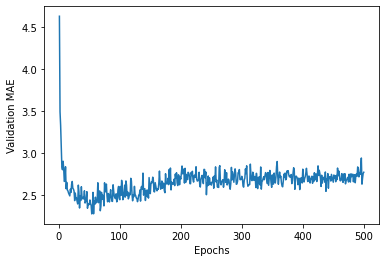

In [8]:
from keras import backend as K
import matplotlib.pyplot as plt

# Some memory clean-up
K.clear_session()
num_epochs = 500
all_mae_histories = []

for i in range(k):
    print('processing fold #', i)
    
    # Prepare the validation data: data from partition # k
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    
    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)

    # Build the Keras model (already compiled)
    model = model_mreze()
    # Train the model (in silent mode, verbose=0)

    history = model.fit(partial_train_data, partial_train_targets, validation_data=(val_data, val_targets), epochs=num_epochs, batch_size=1, verbose=0)

    mae_history = history.history["val_mae"]

    all_mae_histories.append(mae_history)

average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)

plt.xlabel('Epochs')

plt.ylabel('Validation MAE')

plt.show()

#### 3.4.1 Detaljno objasnite sta je postignuto sa datim kodom.

- Pored vec objasnjene `k-fold` varijante, jer se i ovdje koristi, sada se dodatno u `all_mae_histories` cuvaju za svaku iteraciju folda validacijske srednje vrijednosti apsolutne greske.
- Na ovaj nacin ce se za svaku epohu imati `validation MAE` koji je ujedno srednja vrijednost kroz sve iteracije. 
- Naravno sada je povecan broj epoha u svakoj iteraciji, od prijasnjih `100`, sada se pri svakoj iteraciji koristi `500` epoha.
- Na kraju imamo grafik koji predstavlja `validaiton MAE` vrijednost po epohi, te se na osnovu ovog grafika moze odrediti broj optimalnih epoha.

### 3.4.1 Tumacenje rezultata 

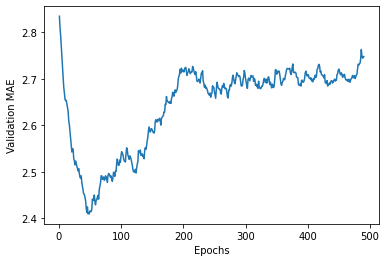

In [9]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    
    return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")

plt.show()

#### 3.4.1.1 Sa zadnjeg grafa (slika 4) moguce je donijeti zakljucak o optimalnom broju epoha koje treba koristiti u ovom slucaju. Objasnite na koji nacin je izvrsen prikaz informacija.

- Dobijeni `validation MAE` po epohama dataset-a je proslijedjen funkciji `smooth_curve` koja prima grafik tj. podatke za grafik i odredjeni `factor` koji je po defaultu `0.9`. Treba napomenuti da se ne salju prvih 10 vrijednosti jer na osnovu grafa imaju vecu `y` vrijednost od svih ostalih tacaka.
- Prolaskom kroz sve tacke (`points`), ako je prva tacka u pitanju ona se dodaje u `smoothed_points`, a ako nije uzima se prethodna tacka i na osnovu formule `previous * factor + point * (1 - factor)` se racuna naredna tacka. Ovakva transformacija se naziva eksponencijalni pomicni prosjek.
- Zavrsetkom se salju nove tacke po pitanju srednje vrijednosti `mae` historije. Ovo nam omogucava precizniji prikaz sa manjom varijansom, te pomocu ovog moze se preciznije odrediti optimalan broj epoha.

#### 3.4.1.2 Koji je optimalan broja epoha koji se treba koristiti u ovom slucaju?

- Optimalan broj epoha u ovom slucaju je `50`.